In [1]:
import thinkstats2
hist = thinkstats2.Hist([1,2,2,3,5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

In [2]:
hist.Freq(2)

2

In [3]:
hist[2]

2

In [4]:
hist.Freq(4)

0

In [5]:
hist.Values()

dict_keys([1, 2, 3, 5])

In [6]:
for val in sorted (hist.Values()):
    print (val, hist.Freq(val))

1 1
2 2
3 1
5 1


In [7]:
for val, freq in hist.Items():
    print(val,freq)

1 1
2 2
3 1
5 1


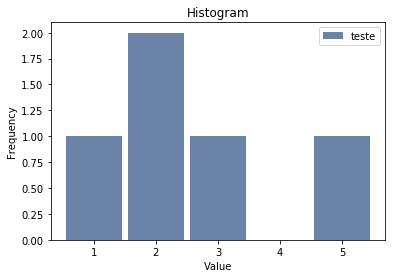

<Figure size 576x432 with 0 Axes>

In [8]:
import thinkplot
thinkplot.Hist(hist, label="teste")
thinkplot.Show(title="Histogram", xlabel="Value", ylabel="Frequency" )

In [9]:
import nsfg

In [10]:
preg = nsfg.ReadFemPreg()
live = preg[ preg.outcome == 1 ]

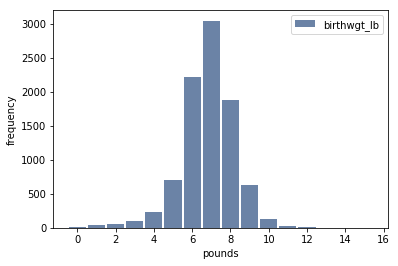

<Figure size 576x432 with 0 Axes>

In [11]:
hist = thinkstats2.Hist(live.birthwgt_lb, label="birthwgt_lb")
thinkplot.Hist(hist)
thinkplot.Show(xlabel="pounds", ylabel="frequency")

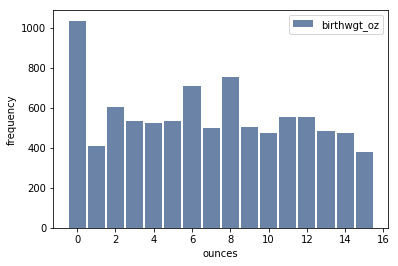

<Figure size 576x432 with 0 Axes>

In [12]:
hist = thinkstats2.Hist(live.birthwgt_oz, label="birthwgt_oz")
thinkplot.Hist(hist)
thinkplot.Show(xlabel="ounces", ylabel="frequency")

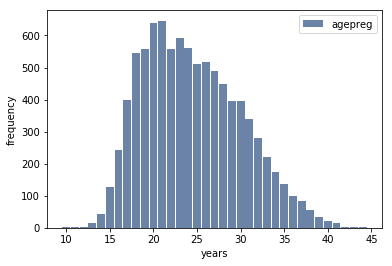

<Figure size 576x432 with 0 Axes>

In [24]:
import numpy as np
age = np.floor(live.agepreg)
hist = thinkstats2.Hist(age, label="agepreg")
thinkplot.Hist(hist)
thinkplot.Show(xlabel="years", ylabel="frequency")

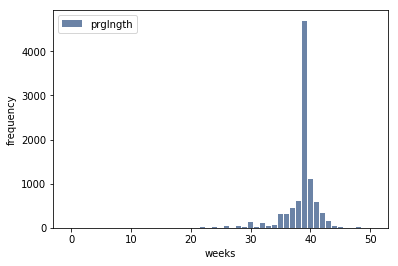

<Figure size 576x432 with 0 Axes>

In [14]:
hist = thinkstats2.Hist(live.prglngth, label="prglngth")
thinkplot.Hist(hist)
thinkplot.Show(xlabel="weeks", ylabel="frequency")

In [15]:
hist.Smallest(7)

[(0, 1), (4, 1), (9, 1), (13, 1), (17, 2), (18, 1), (19, 1)]

In [16]:
hist.Largest(7)

[(50, 2), (48, 7), (47, 1), (46, 1), (45, 10), (44, 46), (43, 148)]

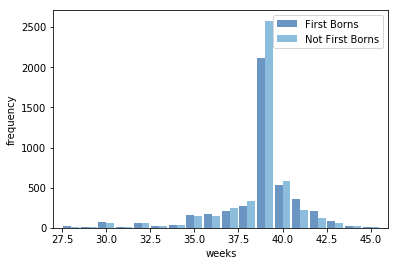

<Figure size 576x432 with 0 Axes>

In [17]:
firsts = live[ (live.birthord == 1)]
others = live[live.birthord != 1]
first_hist  = thinkstats2.Hist(firsts.prglngth, label="First Borns")
others_hist = thinkstats2.Hist(others.prglngth, label="Not First Borns")
width=0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist , align='right', width=width)
thinkplot.Hist(others_hist, align='left' , width=width)
thinkplot.Show(xlabel="weeks", ylabel="frequency", xlim=[27,46])


In [18]:
firsts.caseid.count()

4413

In [19]:
others.caseid.count()

4735

In [20]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()
summary = [mean,var,std]
print("""
For all live births, the mean pregnancy length is {mean:.2f} weeks, 
the standard deviation is {std:.2f} weeks, which means we 
should expect deviations of 2-3 weeks to be common.

Variance of pregnance length is {var:.2f}, which is hard to interpret, 
specially since the unis are weeks2, os square weeks. 
Variance is useful in some calculations, but it is not a good summary statistics
""".format(
    mean=mean, 
    std=std, 
    var=var)
)


For all live births, the mean pregnancy length is 38.56 weeks, 
the standard deviation is 2.70 weeks, which means we 
should expect deviations of 2-3 weeks to be common.

Variance of pregnance length is 7.30, which is hard to interpret, 
specially since the unis are weeks2, os square weeks. 
Variance is useful in some calculations, but it is not a good summary statistics



Cohen's d is a statistic tha compares the difference between groups to the variability within groups: 
```
d = mean(x1) - mean(x2)
    -------------------
           s
```
Where x1 and x2 are both groups
s = "pooled standard deviation"

In [21]:
import math
diff       = firsts.prglngth.mean()-others.prglngth.mean()
var1, var2 = firsts.prglngth.var(), others.prglngth.var()
n1,n2      = len(firsts), len(others)
pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
d = diff / math.sqrt(pooled_var)
d

0.028879044654449834

Which summary statistics would you use if you wanted to get a story on the evening news?


In [22]:
fmean, omean = firsts.prglngth.mean(), others.prglngth.mean()
fstd, ostd   = firsts.prglngth.std(),  others.prglngth.std()
diff = (fmean - omean)
var1, var2 = firsts.prglngth.var(), others.prglngth.var()
n1,n2      = len(firsts), len(others)
pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
d = diff / math.sqrt(pooled_var)
print("""
{meanTitle:>13}{sdTitle:>7}{cohenTitle:>8}{unityTitle:>9}
First:  {fmean:>5.2f} {fstd:>6.2f} {d:>7.2f} {unity:>8}
Other:  {omean:>5.2f} {ostd:>6.2f} {d:>7.2f} {unity:>8}

When comparing simple averages, first borns are likely to born  {meandiff:.2f} (hrs) later than other babies in average

When comparing averages with their variations, it's common for first borns come late by {d:.2f} hrs than other babies

""".format(
    meanTitle = "mean",
    sdTitle = "sd",
    cohenTitle = "Coh.D",
    unityTitle = "Unity",
    unity = "weeks",
    fmean=fmean, 
    fstd=fstd,
    omean=omean, 
    ostd=ostd,
    meandiff=diff*7*24,
    d = d * 7 * 24
)
)


         mean     sd   Coh.D    Unity
First:  38.60   2.79    4.85    weeks
Other:  38.52   2.62    4.85    weeks

When comparing simple averages, first borns are likely to born  13.11 (hrs) later than other babies in average

When comparing averages with their variations, it's common for first borns come late by 4.85 hrs than other babies


